In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [3]:
PATH = Path('data')
train_path = PATH/'TrainVal'

In [9]:
def count(iter):
    return sum(1 for _ in iter)

In [10]:
# class_len = {int(str(i).split('/')[-1]): len(i.ls()) for i in train_path.ls()}
class_len = {int(str(i).split('/')[-1]): count(i.iterdir()) for i in train_path.iterdir()}

<BarContainer object of 103 artists>

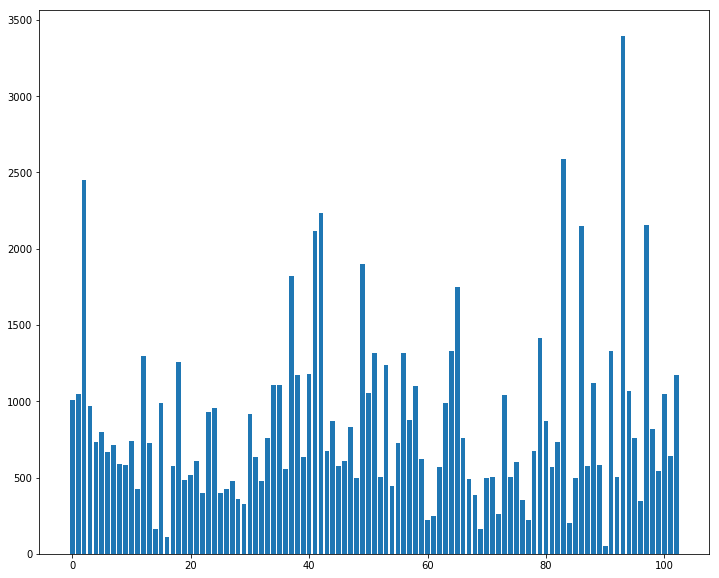

In [11]:
fig,ax = plt.subplots(figsize=(12,10))
plt.bar(list(class_len.keys()),list(class_len.values()))

In [12]:
{k:v for k,v in class_len.items() if v<=300}

{14: 161,
 69: 162,
 61: 250,
 77: 222,
 72: 260,
 60: 221,
 16: 112,
 90: 52,
 84: 199}

Class 90 only has 52 images

In [13]:
{k:v for k,v in class_len.items() if v>=2000}

{97: 2158, 42: 2236, 83: 2590, 93: 3393, 41: 2117, 2: 2448, 86: 2148}

# Clean up invalid images

Code to extract invalid files to csv is in python module.

Remove invalid files:

In [14]:
def get_files(c, extensions=None, recurse=False):
    "Return list of files in `c` that have a suffix in `extensions`. `recurse` determines if we search subfolders."
    return [o for o in Path(c).glob('**/*' if recurse else '*')
            if not o.name.startswith('.') and not o.is_dir()
            and (extensions is None or (o.suffix.lower() in extensions))]


In [15]:
temp=get_files(PATH,'.csv')

In [16]:
invalids=[]
for i in temp:
    invalids+= pd.read_csv(i).loc[:,'0'].tolist()
invalids

['data\\TrainVal\\65\\73112.jpg',
 'data\\TrainVal\\65\\73756.jpg',
 'data\\TrainVal\\93\\104911.jpg',
 'data\\TrainVal\\93\\106196.jpg',
 'data\\TrainVal\\93\\106716.jpg',
 'data\\TrainVal\\93\\106838.jpg',
 'data\\TrainVal\\93\\107044.jpg',
 'data\\TrainVal\\40\\41018.jpg',
 'data\\TrainVal\\40\\41330.jpg',
 'data\\TrainVal\\68\\76949.jpg',
 'data\\TrainVal\\32\\29337.jpg',
 'data\\TrainVal\\32\\29379.jpg',
 'data\\TrainVal\\32\\29405.jpg',
 'data\\TrainVal\\25\\23296.jpg',
 'data\\TrainVal\\37\\35800.jpg',
 'data\\TrainVal\\58\\66127.jpg',
 'data\\TrainVal\\42\\46220.jpg',
 'data\\TrainVal\\98\\113907.jpg',
 'data\\TrainVal\\41\\42456.jpg',
 'data\\TrainVal\\41\\43371.jpg',
 'data\\TrainVal\\83\\89737.jpg',
 'data\\TrainVal\\83\\90980.jpg',
 'data\\TrainVal\\83\\90986.jpg',
 'data\\TrainVal\\83\\91786.jpg',
 'data\\TrainVal\\83\\92373.jpg',
 'data\\TrainVal\\83\\92789.jpg']

In [24]:
a='123'
a.replace('2','5')

'153'

In [25]:
invalids2= [i.replace('\\','/') for i in invalids]
invalids2

['data/TrainVal/65/73112.jpg',
 'data/TrainVal/65/73756.jpg',
 'data/TrainVal/93/104911.jpg',
 'data/TrainVal/93/106196.jpg',
 'data/TrainVal/93/106716.jpg',
 'data/TrainVal/93/106838.jpg',
 'data/TrainVal/93/107044.jpg',
 'data/TrainVal/40/41018.jpg',
 'data/TrainVal/40/41330.jpg',
 'data/TrainVal/68/76949.jpg',
 'data/TrainVal/32/29337.jpg',
 'data/TrainVal/32/29379.jpg',
 'data/TrainVal/32/29405.jpg',
 'data/TrainVal/25/23296.jpg',
 'data/TrainVal/37/35800.jpg',
 'data/TrainVal/58/66127.jpg',
 'data/TrainVal/42/46220.jpg',
 'data/TrainVal/98/113907.jpg',
 'data/TrainVal/41/42456.jpg',
 'data/TrainVal/41/43371.jpg',
 'data/TrainVal/83/89737.jpg',
 'data/TrainVal/83/90980.jpg',
 'data/TrainVal/83/90986.jpg',
 'data/TrainVal/83/91786.jpg',
 'data/TrainVal/83/92373.jpg',
 'data/TrainVal/83/92789.jpg']

In [26]:
import os
for i in invalids2:
    os.remove(i)

# Show images

In [27]:
def show_img_from_list(l,rows,cols,figsize=(12,10),cmap='binary'):
    fig,axes = plt.subplots(rows,cols,figsize=figsize)
    i=0
    for r in range(rows):
        for c in range(cols):
            img = mpimg.imread(l[i])
            axes[r][c].imshow(img)
            axes[r][c].set_axis_off()
            i+=1
    plt.tight_layout()

# Fastai classes

In [29]:
from fastai import *
from fastai.vision import *

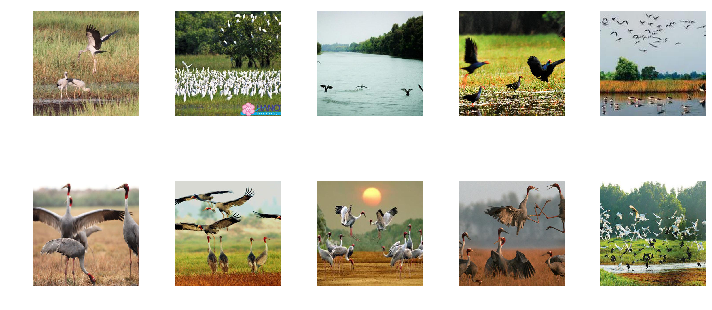

In [30]:
fnames = get_image_files('data/TrainVal/90')
show_img_from_list(fnames,2,5,figsize=(10,5))

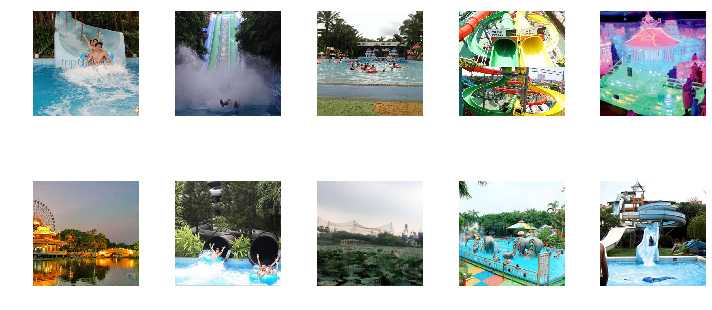

In [31]:
show_img_from_list(get_image_files('data/TrainVal/16')[10:],2,5,figsize=(10,5))

## Image size

In [ ]:
plt.imread(data.train_ds.x[0]).shape[:2]

img_shape=[plt.imread(i).shape[:2] for i in data.train_ds.x[200:1000]]

widths,heights= zip(*img_shape)

plt.scatter(widths,heights)

# Training

In [32]:
PATH = Path('data')
train_path = PATH/'TrainVal'

data = ImageDataBunch.from_folder(PATH,train='TrainVal',valid_pct=.15,ds_tfms = get_transforms(),size=224,bs=64).normalize(imagenet_stats)

In [33]:
# Training with resnet50

learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [34]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


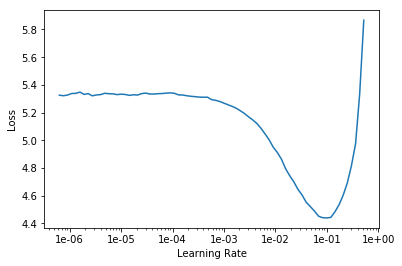

In [35]:
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(2,max_lr=3e-02)

Total time: 10:41
epoch  train_loss  valid_loss  error_rate
1      1.780896    1.519623    0.394293    (05:31)
2      0.946459    0.702750    0.203250    (05:10)



In [37]:
# learn.save('stage1-34')

In [38]:
learn.fit_one_cycle(6,max_lr=3e-02)

epoch,train_loss,valid_loss,error_rate
1,2.770793,2.169343,0.485734
2,4.914976,17.184919,0.745376


Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/quantran/anaconda3/envs/python37/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/home/quantran/anaconda3/envs/python37/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/quantran/anaconda3/envs/python37/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/home/quantran/anaconda3/envs/python37/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/home/quantran/anaconda3/envs/python37/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/home/quantran/anaconda3/envs/python37/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offs

KeyboardInterrupt: 